## Stochastic Gradient Descent

In this suplementary section, we introduce the powerful idea of stochastic gradient descent. At each iteration  (learning step) we compute the gradient direction based on a subset of the data, which we call the training data, rather than on the entire data set. Thus, the decrease in the loss fsunction is not guaranteed at each iteration. This may seem like a disadvantage at first, since there may be more iterations needed to achieve the same level of accuracy, but there is interesting theory to back up such a strategy which benefits from decrease in the compute required, and also it assures avoiding the possibility of overfitting the data.

### Software Prerequisites

The following Python libraries are prerequisites to run this notebook; simply run the following code block to install them. They are also listed in the `requirements.txt` file in the root of this notebook's [GitHub repository](https://github.com/uccs-math-clinic/mc-workshops).

When you run this code block for the first time, you will need to restart the kernel by navigating to `Kernel -> Restart` in the menu bar.

In [4]:
%pip install matplotlib==3.5.1 \
             numpy==1.21.5

You should consider upgrading via the '/work/jonathan/uccs/mc-workshops/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


With our package dependencies installed, we can run the following cell in order to import the packages needed for this notebook:

In [1]:
# We import a few different libraries that make our work a bit easier.
# We also give them each aliases (the part after "as") which make them
# a little easier to remember; the ones shown below are those used 
# most commonly, but you can call these whatever you want! This practice
# is quite prevalent in Python as a whole, and doubly so in data science.
#
import numpy as np
import matplotlib.pyplot as plt
import time

# In addition to our usual imports, we add a tool to split our dataset into
# training data (used to compute the gradient direction) and testing data 
# (which can be used for validation, although it will not happen here).

from sklearn.model_selection import train_test_split

# This allows us to run animations in this notebook; this isn't necessary
# for the vast majority of notebooks, but it does serve as a useful teaching
# tool.
#
%matplotlib notebook
plt.ion()

<IPython.core.display.Javascript object>


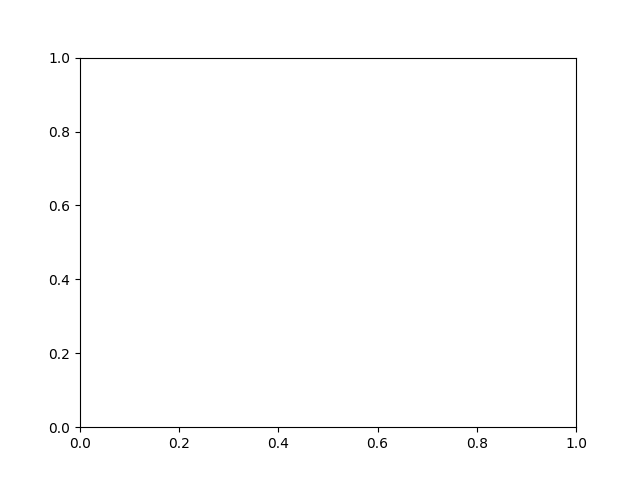

NameError: name 'calculate_gradient' is not defined

In [2]:

# The next few lines of code simply are reproduced from the gradient descent cell above, as initiating the steps
%matplotlib notebook
plt.ion()
fig, ax = plt.subplots()

theta_1 = 0
theta_2 = 0

dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x, y)
convergence_error_threshold = 0.1
y_train_predicted = theta_1 * x + theta_2
z, = ax.plot(x, y_predicted, color='orange')

ax.set_ylim(bottom=-5)

loss_old = err
loss_val=loss_old

# Now is the iterative step, where at each iteration we split the data.

for i in range(1000):
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)

    ax.scatter(x_train, y_train, color='black')
    ax.scatter(x_test, y_test, color='red')
    
    # Calculate the new gradient and corresponding line based on the training data only
    
    dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x_train, y_train)
          
    theta_1 = theta_1 - (learning_rate * dtheta_1)
    theta_2 = theta_2 - (learning_rate * dtheta_2)
    
    y_train_predicted = theta_1 * x_train + theta_2
    
    # Plot new line values - as before, these lines are mostly for
    # animation purposes.
    #
    z.set_xdata(x_train)
    z.set_ydata(y_train_predicted)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # Comment out this line if you want to see how fast this can converge!
    time.sleep(0.01)
    
    # For the termination condition, we need to compute the value of the loss function
    # and also set the acceptable min loss change
    
    loss_new = err

    acceptable_min_delta_loss = 0.005*loss_new
    
    if abs(loss_new-loss_old) < acceptable_min_delta_loss:
        print('We converged to our specified tolerance in {} iterations!'.format(i))
        break
           
    loss_old = loss_new       

    loss_val= np.append(loss_val, loss_old)
    
plt.figure()
plt.plot(loss_val)


#### Alternative Loss Functions

In this final section of the notebook, we turn things over to you to derive and code up a gradient function for the mean squared logarithmic error (MSLE) function, which is very similar to the mean squared error function we've already worked with. While the MSE function heavily penalizes significant data outliers (since that loss function increases as the square of the difference between data points), the MSLE function relaxes that penalty a fair amount by taking the square of the difference of the _logarithm_ of the data points:

$$ 
\begin{align*}
L_{MSLE} &= \frac{1}{n}\sum\limits_{i=0}^{n}{\left( \ln{\bar{y}_i} - \ln{y_i} \right)^2} \\
  &= \frac{1}{n}\sum\limits_{i=0}^{n}{\left(\ln{(\theta_1 x_i + \theta_2)} - \ln{y_i} \right)^2}
\end{align*}
$$

We've outlined the code below and denoted the section into which you should encode the gradient which you derive:

<IPython.core.display.Javascript object>


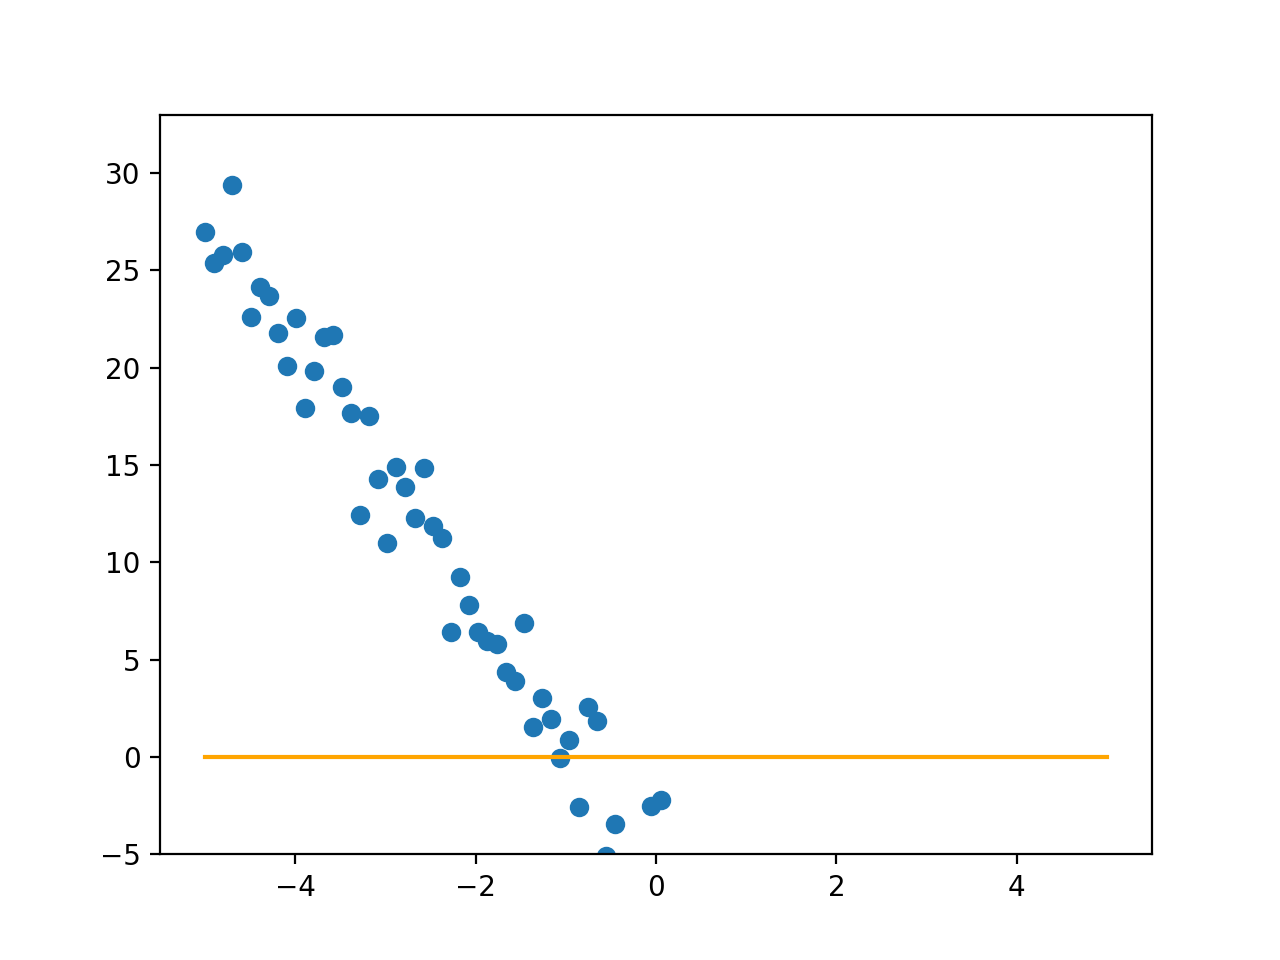

We converged to our specified tolerance in 0 iterations!


In [45]:
%matplotlib notebook
plt.ion()
fig, ax = plt.subplots()

left_xlim = -5
right_xlim = 5

[m, b] = np.random.randint(1, 10, size=2) * np.random.choice([-1,1])
x = np.linspace(left_xlim, right_xlim, 100)[:, np.newaxis]
y = m * x + b + (2 * np.random.randn(100, 1))
ax.scatter(x, y)

theta_1 = 0
theta_2 = 0

# This is where you should encode the gradient of your loss function.
#
def calculate_gradient(slope, intercept, x_vals, y_vals):
    # Calculate mean standard logarithmic error gradient.
    # np.log() is your friend!
    #
    abs_error = 0
    d_slope = 0
    d_intercept = 0
    
    # Calculate mean standard logarithmic error value
    #
    msle = np.sum(np.power(abs_error, 2)) / len(x_vals)
    
    return (d_slope, d_intercept, msle)
    
dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x, y)
convergence_error_threshold = 0.1
y_predicted = theta_1 * x + theta_2
z, = ax.plot(x, y_predicted, color='orange')

ax.set_ylim(bottom=-5)

acceptable_min_gradient = 0.01

for i in range(1000):
    if max(abs(dtheta_1), abs(dtheta_2)) < acceptable_min_gradient:
        print('We converged to our specified tolerance in {} iterations!'.format(i))
        break
        
    theta_1 = theta_1 - (learning_rate * dtheta_1)
    theta_2 = theta_2 - (learning_rate * dtheta_2)
    
    dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x, y)
    y_predicted = theta_1 * x + theta_2
    
    z.set_ydata(y_predicted)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # Comment out this line if you want to see how your loss function converges;
    # it should converge somewhat slower than the MSE!
    time.sleep(0.05)